<a href="https://colab.research.google.com/github/woojoo123/Project/blob/main/Psychological_counseling_chatbot/KoGPT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 준비

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df1 = pd.read_excel('/content/drive/MyDrive/프로젝트/심리상담 챗봇/data/감성대화말뭉치(최종데이터)_Training.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/프로젝트/심리상담 챗봇/data/감성대화말뭉치(최종데이터)_Validation.xlsx')

In [ ]:
df_combined = pd.concat([df1, df2], ignore_index=True)  # index 초기화
df_combined

,Unnamed: 0,연령,성별,상황키워드,신체질환,감정_대분류,감정_소분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
0,1,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
1,2,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
2,3,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN
3,4,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,NaN,NaN
4,5,청년,여성,"진로,취업,직장",해당없음,분노,노여워하는,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58266,6637,청년,여성,"연애,결혼,출산",해당없음,당황,열등감,나랑 비슷한 시기에 결혼하는 친구는 시댁에서 집을 해줘서 너무 부러워. 우리는 대출...,같은 시기에 결혼하는 친구들끼리 상황이 다르다 보니 마음이 좋지 않으시겠어요.,우리만 뒤처지는 것 같고. 그래도 열심히 살다 보면 우리도 집을 살 수 있겠지?,우리 부부만 뒤처지는 것 같아 속상하지만 열심히 살다 보면 집을 살 수 있다고 믿으...,NaN,NaN
58267,6638,청년,여성,"연애,결혼,출산",해당없음,당황,열등감,친구 한 명이 결혼해서 아이를 가졌는데 너무 행복해 보이더라. 기분이 좋지만은 않아.,기분이 좋지 않으신 이유를 알고 계시나요?,나도 결혼했지만 아이도 생기지 않고 그 정도로 행복하지 않거든. 친구보다 못사는 것...,친구분과 비교하게 되어 기분이 좋지 않으셨군요. 어떻게 하면 기분이 풀릴 수 있을까요?,NaN,NaN
58268,6639,청년,여성,"연애,결혼,출산",해당없음,당황,열등감,남들은 결혼 전에 일억을 모았다는데 난 뭐를 한 것인지 모르겠어. 자괴감만 드네.,돈을 모으는 것으로 자괴감이 드시는군요.,요새 집값이 너무 올라서 한숨만 나와.,집값이 올라 한숨만 나오시는군요.,NaN,NaN
58269,6640,청년,여성,"연애,결혼,출산",해당없음,당황,열등감,나보다 결혼을 먼저 한 친구가 부러워. 그 친구 남편은 직장도 내 남편보다 좋고 키...,먼저 결혼한 친구가 부럽군요.,맞아. 그 친구와 비교하게 되니 자존감이 낮아지는 기분이야.,비교로 자존감이 낮아지는군요.,NaN,NaN


In [ ]:
# 불필요한 열 삭제
df_combined_cleaned = df_combined.drop(columns=['Unnamed: 0', '연령', '성별', '상황키워드', '신체질환', '감정_소분류'])

# 결과 확인
df_combined_cleaned

,감정_대분류,사람문장1,시스템문장1,사람문장2,시스템문장2,사람문장3,시스템문장3
0,분노,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
1,분노,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
2,분노,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN
3,분노,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,NaN,NaN
4,분노,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,NaN,NaN
...,...,...,...,...,...,...,...
58266,당황,나랑 비슷한 시기에 결혼하는 친구는 시댁에서 집을 해줘서 너무 부러워. 우리는 대출...,같은 시기에 결혼하는 친구들끼리 상황이 다르다 보니 마음이 좋지 않으시겠어요.,우리만 뒤처지는 것 같고. 그래도 열심히 살다 보면 우리도 집을 살 수 있겠지?,우리 부부만 뒤처지는 것 같아 속상하지만 열심히 살다 보면 집을 살 수 있다고 믿으...,NaN,NaN
58267,당황,친구 한 명이 결혼해서 아이를 가졌는데 너무 행복해 보이더라. 기분이 좋지만은 않아.,기분이 좋지 않으신 이유를 알고 계시나요?,나도 결혼했지만 아이도 생기지 않고 그 정도로 행복하지 않거든. 친구보다 못사는 것...,친구분과 비교하게 되어 기분이 좋지 않으셨군요. 어떻게 하면 기분이 풀릴 수 있을까요?,NaN,NaN
58268,당황,남들은 결혼 전에 일억을 모았다는데 난 뭐를 한 것인지 모르겠어. 자괴감만 드네.,돈을 모으는 것으로 자괴감이 드시는군요.,요새 집값이 너무 올라서 한숨만 나와.,집값이 올라 한숨만 나오시는군요.,NaN,NaN
58269,당황,나보다 결혼을 먼저 한 친구가 부러워. 그 친구 남편은 직장도 내 남편보다 좋고 키...,먼저 결혼한 친구가 부럽군요.,맞아. 그 친구와 비교하게 되니 자존감이 낮아지는 기분이야.,비교로 자존감이 낮아지는군요.,NaN,NaN


In [ ]:
# 열 이름 변경
df_combined_cleaned = df_combined_cleaned.rename(columns={
    '사람문장1': '사람문장',
    '사람문장2': '사람문장',
    '사람문장3': '사람문장',
    '시스템문장1': '시스템문장',
    '시스템문장2': '시스템문장',
    '시스템문장3': '시스템문장'
})

# 결과 확인
df_combined_cleaned

,감정_대분류,사람문장,시스템문장,사람문장,시스템문장,사람문장,시스템문장
0,분노,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?,그냥 내가 해결하는 게 나아. 남들한테 부담 주고 싶지도 않고.,혼자 해결하기로 했군요. 혼자서 해결하기 힘들면 주위에 의논할 사람을 찾아보세요.,NaN,NaN
1,분노,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?,최대한 지출을 억제해야겠어. 월급이 줄어들었으니 고정지출을 줄일 수밖에 없을 것 같아.,월급이 줄어든 만큼 소비를 줄일 계획이군요.,NaN,NaN
2,분노,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...,잘 안 맞는 사람이랑 억지로 잘 지내는 것보단 조금은 거리를 두고 예의를 갖춰서 대...,스트레스받지 않기 위해선 인간관계에 있어 약간의 거리를 두는 게 좋겠군요.,NaN,NaN
3,분노,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...,직장 사람들과 솔직하게 이야기해보고 싶어. 일하는 데에 방해된다고.,직장 사람들과 이야기를 해 보겠다고 결심하셨군요.,NaN,NaN
4,분노,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...,상사인 나에게 먼저 인사하지 않아서 매일 내가 먼저 인사한다고!,항상 먼저 인사하게 되어 화가 나셨군요. 어떻게 하면 신입사원에게 화났음을 표현할 ...,NaN,NaN
...,...,...,...,...,...,...,...
58266,당황,나랑 비슷한 시기에 결혼하는 친구는 시댁에서 집을 해줘서 너무 부러워. 우리는 대출...,같은 시기에 결혼하는 친구들끼리 상황이 다르다 보니 마음이 좋지 않으시겠어요.,우리만 뒤처지는 것 같고. 그래도 열심히 살다 보면 우리도 집을 살 수 있겠지?,우리 부부만 뒤처지는 것 같아 속상하지만 열심히 살다 보면 집을 살 수 있다고 믿으...,NaN,NaN
58267,당황,친구 한 명이 결혼해서 아이를 가졌는데 너무 행복해 보이더라. 기분이 좋지만은 않아.,기분이 좋지 않으신 이유를 알고 계시나요?,나도 결혼했지만 아이도 생기지 않고 그 정도로 행복하지 않거든. 친구보다 못사는 것...,친구분과 비교하게 되어 기분이 좋지 않으셨군요. 어떻게 하면 기분이 풀릴 수 있을까요?,NaN,NaN
58268,당황,남들은 결혼 전에 일억을 모았다는데 난 뭐를 한 것인지 모르겠어. 자괴감만 드네.,돈을 모으는 것으로 자괴감이 드시는군요.,요새 집값이 너무 올라서 한숨만 나와.,집값이 올라 한숨만 나오시는군요.,NaN,NaN
58269,당황,나보다 결혼을 먼저 한 친구가 부러워. 그 친구 남편은 직장도 내 남편보다 좋고 키...,먼저 결혼한 친구가 부럽군요.,맞아. 그 친구와 비교하게 되니 자존감이 낮아지는 기분이야.,비교로 자존감이 낮아지는군요.,NaN,NaN


In [ ]:
# 사람문장과 시스템문장을 세로로 합치기
people_columns = ['사람문장']  # 사람문장만 사용
system_columns = ['시스템문장']  # 시스템문장만 사용

# 사람문장과 시스템문장을 melt로 세로로 합침
people_melted = df_combined_cleaned[people_columns].melt(var_name='사람문장', value_name='사람문장_내용')
system_melted = df_combined_cleaned[system_columns].melt(var_name='시스템문장', value_name='시스템문장_내용')

# 감정_대분류를 추가한 후 두 데이터를 결합
df_combined_final = pd.DataFrame()
df_combined_final['감정_대분류'] = df_combined_cleaned['감정_대분류'].repeat(3).reset_index(drop=True)
df_combined_final['사람문장'] = people_melted['사람문장_내용']
df_combined_final['시스템문장'] = system_melted['시스템문장_내용']

# 결과 확인
df_combined_final

,감정_대분류,사람문장,시스템문장
0,분노,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?
1,분노,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?
2,분노,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...
3,분노,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...
4,분노,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...
...,...,...,...
174808,당황,NaN,NaN
174809,당황,NaN,NaN
174810,당황,NaN,NaN
174811,당황,NaN,NaN


In [ ]:
# NaN이 포함된 행 삭제
df_combined_final_cleaned = df_combined_final.dropna()

# 결과 확인
df_combined_final_cleaned

,감정_대분류,사람문장,시스템문장
0,분노,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?
1,분노,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?
2,분노,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...
3,분노,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...
4,분노,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...
...,...,...,...
174728,당황,말해봐도 소용이 없어.,말해도 친구가 계속 늦는군요.
174729,슬픔,부모님께는 자주 찾아뵙는 게 우선일 거고 남편에겐 힘낼 수 있는 말을 자주 해 줄 ...,가족에게 감사한 마음을 표현하기로 하셨군요.
174748,상처,좋아하는 노래를 한 곡 듣고 기분이 나아진 상태에서 친구들과 대화를 하면 좋을 것 같아.,노래를 들으며 기분 전환을 하시는군요.
174750,상처,함께 점심도 먹고 친하게 지내고 있어.,점심도 먹으며 친구와 친하게 지내고 계시는군요.


In [ ]:
# 열 이름 변경
df_combined_final_cleaned = df_combined_final_cleaned.rename(columns={'감정_대분류': 'Emotion', '사람문장':'Q', '시스템문장':'A'})
df_combined_final_cleaned

,Emotion,Q,A
0,분노,일은 왜 해도 해도 끝이 없을까? 화가 난다.,많이 힘드시겠어요. 주위에 의논할 상대가 있나요?
1,분노,이번 달에 또 급여가 깎였어! 물가는 오르는데 월급만 자꾸 깎이니까 너무 화가 나.,급여가 줄어 속상하시겠어요. 월급이 줄어든 것을 어떻게 보완하실 건가요?
2,분노,회사에 신입이 들어왔는데 말투가 거슬려. 그런 애를 매일 봐야 한다고 생각하니까 스...,회사 동료 때문에 스트레스를 많이 받는 것 같아요. 문제 해결을 위해 어떤 노력을 ...
3,분노,직장에서 막내라는 이유로 나에게만 온갖 심부름을 시켜. 일도 많은 데 정말 분하고 ...,관련 없는 심부름을 모두 하게 되어서 노여우시군요. 어떤 것이 상황을 나아질 수 있...
4,분노,얼마 전 입사한 신입사원이 나를 무시하는 것 같아서 너무 화가 나.,무시하는 것 같은 태도에 화가 나셨군요. 상대방의 어떤 행동이 그런 감정을 유발하는...
...,...,...,...
174728,당황,말해봐도 소용이 없어.,말해도 친구가 계속 늦는군요.
174729,슬픔,부모님께는 자주 찾아뵙는 게 우선일 거고 남편에겐 힘낼 수 있는 말을 자주 해 줄 ...,가족에게 감사한 마음을 표현하기로 하셨군요.
174748,상처,좋아하는 노래를 한 곡 듣고 기분이 나아진 상태에서 친구들과 대화를 하면 좋을 것 같아.,노래를 들으며 기분 전환을 하시는군요.
174750,상처,함께 점심도 먹고 친하게 지내고 있어.,점심도 먹으며 친구와 친하게 지내고 계시는군요.


In [ ]:
df_combined_final_cleaned.to_csv('/content/drive/MyDrive/프로젝트/심리상담 챗봇/data/final_data', index=False)

# 템플릿 설정

In [ ]:
import pandas as pd

# 감정 분류된 데이터 로드
df = pd.read_csv("/content/drive/MyDrive/프로젝트/심리상담 챗봇/data/final_data.csv")

# KoGPT2 학습용 템플릿 적용 파일 경로
output_txt_path = "/content/drive/MyDrive/프로젝트/심리상담 챗봇/data/new_kogpt2_training_data_with_template.txt"

# 템플릿 적용하여 저장 (한 개의 샘플을 한 줄로 저장)
with open(output_txt_path, "w", encoding="utf-8") as f:
    for _, row in df.iterrows():
        input_text = f"<|system|> 당신은 감정을 고려해 답변하는 상담 챗봇입니다. "
        input_text += f"<|user|> {row['Q']} "
        input_text += f"<|emotion|> {row['Emotion']} "
        input_text += f"<|assistant|> {row['A']}\n"
        f.write(input_text)

print(f"챗 템플릿 적용된 학습 데이터 저장 완료! -> {output_txt_path}")

챗 템플릿 적용된 학습 데이터 저장 완료! -> /content/drive/MyDrive/프로젝트/심리상담 챗봇/data/new_kogpt2_training_data_with_template.txt


# 모델과 토크나이저 로드

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.2 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import GPT2LMHeadModel, PreTrainedTokenizerFast, Trainer, TrainingArguments, DataCollatorForLanguageModeling
from datasets import load_dataset

# KoGPT2 모델과 토크나이저 로드
model_name = "skt/kogpt2-base-v2"
tokenizer = PreTrainedTokenizerFast.from_pretrained(
    model_name,
    bos_token='</s>',
    eos_token='</s>',
    unk_token='<unk>',
    pad_token='<pad>',
    mask_token='<mask>'
    )
model = GPT2LMHeadModel.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer.json:   0%|          | 0.00/2.83M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


pytorch_model.bin:   0%|          | 0.00/513M [00:00<?, ?B/s]

In [ ]:
# 템플릿이 적용된 데이터셋 로드

output_txt_path = "/content/drive/MyDrive/프로젝트/심리상담 챗봇/data/new_kogpt2_training_data_with_template.txt"
dataset = load_dataset("text", data_files={"train": output_txt_path})

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 163934
    })
})

In [ ]:
dataset['train'][0]

{'text': '<|system|> 당신은 감정을 고려해 답변하는 상담 챗봇입니다. <|user|> 일은 왜 해도 해도 끝이 없을까? 화가 난다. <|emotion|> 분노 <|assistant|> 많이 힘드시겠어요. 주위에 의논할 상대가 있나요?'}

# 데이터 분할

In [ ]:
# 90% Train, 10% Validation으로 나누기
dataset = dataset["train"].train_test_split(test_size=0.1)

# 결과 확인
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 147540
    })
    test: Dataset({
        features: ['text'],
        num_rows: 16394
    })
})


# max_length 설정

평균 토큰 길이: 68.82
최대 토큰 길이: 924
95% 퍼센타일 길이: 82.0


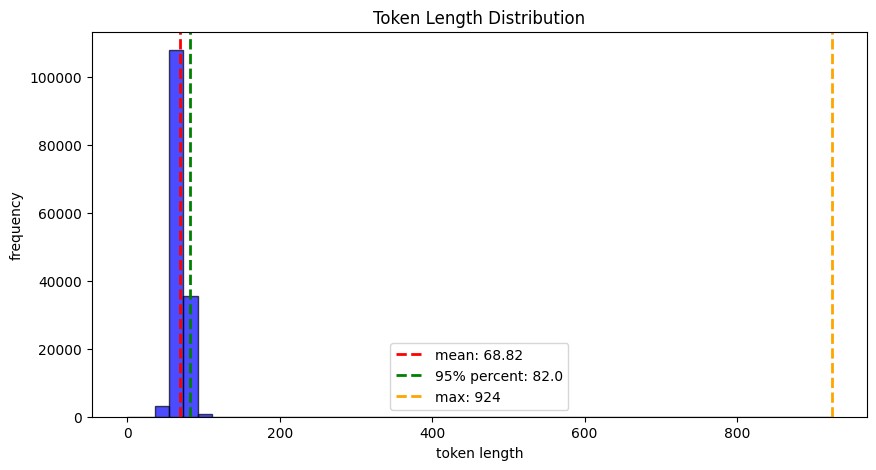

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 문장을 토큰화한 후 길이 측정
token_lengths = [len(tokenizer.encode(text, truncation=False)) for text in dataset["train"]["text"]]

# 평균, 최대, 95% 퍼센타일 확인
mean_length = np.mean(token_lengths)
max_length = np.max(token_lengths)
percentile_95 = np.percentile(token_lengths, 95)

print(f"평균 토큰 길이: {mean_length:.2f}")
print(f"최대 토큰 길이: {max_length}")
print(f"95% 퍼센타일 길이: {percentile_95}")

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.hist(token_lengths, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=2, label=f'mean: {mean_length:.2f}')
plt.axvline(percentile_95, color='green', linestyle='dashed', linewidth=2, label=f'95% percent: {percentile_95}')
plt.axvline(max_length, color='orange', linestyle='dashed', linewidth=2, label=f'max: {max_length}')

plt.xlabel("token length")
plt.ylabel("frequency")
plt.title("Token Length Distribution")
plt.legend()
plt.show()

# 토큰화

In [ ]:
# 토큰화 함수 정의 (GPT-2는 Causal LM이므로 `labels`는 자동으로 shift 처리됨)
def tokenize_function(examples):
    # 문장 토큰화 (길이 자르기 및 패딩)
    tokenized_inputs = tokenizer(examples["text"], truncation=True, max_length=128)

    # GPT-2는 labels를 자동으로 설정하므로 `labels` 추가는 필요 없음
    return tokenized_inputs

# 데이터셋에 토큰화 적용
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# 데이터셋 확인
print(tokenized_datasets)

Map:   0%|          | 0/147540 [00:00<?, ? examples/s]

Map:   0%|          | 0/16394 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 147540
    })
    test: Dataset({
        features: ['text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 16394
    })
})


In [ ]:
# 불필요한 컬럼 삭제
tokenized_datasets = tokenized_datasets.remove_columns(["text", "token_type_ids"])

# 삭제된 데이터셋 확인
print(tokenized_datasets)

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 147540
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask'],
        num_rows: 16394
    })
})


# 모델 학습

In [ ]:
from transformers import DataCollatorForLanguageModeling

# Dynamic Padding 적용
collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False  # GPT-2는 Masked Language Model(MLM) 방식이 아님
)

# 학습 설정
training_args = TrainingArguments(
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    learning_rate=5e-5,
    max_grad_norm=1,
    num_train_epochs=5,
    evaluation_strategy='steps',
    logging_strategy='steps',
    logging_steps=2000,
    logging_dir='/content/drive/MyDrive/프로젝트/심리상담 챗봇/re_KoGPT-2/logs',
    save_strategy="steps",
    save_steps=2000,
    output_dir='/content/drive/MyDrive/프로젝트/심리상담 챗봇/re_KoGPT-2/ckpt',
    report_to='tensorboard'
)


# Trainer 생성
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets['test'],
    tokenizer=tokenizer,
    data_collator=collator
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-13-fa954dcabc21>:28: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# 학습 시작
trainer.train()

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Step,Training Loss,Validation Loss
2000,1.320400,1.269626
4000,1.252200,1.230492
6000,1.180200,1.215186
8000,1.153200,1.199384
10000,1.119200,1.195771
12000,1.077400,1.185081
14000,1.069700,1.185549
16000,1.010300,1.181097
18000,1.014600,1.172590
20000,0.973100,1.177879


TrainOutput(global_step=23055, training_loss=1.0963979436063218, metrics={'train_runtime': 19404.4607, 'train_samples_per_second': 38.017, 'train_steps_per_second': 1.188, 'total_flos': 3.3019908890112e+16, 'train_loss': 1.0963979436063218, 'epoch': 5.0})

In [ ]:
# 학습된 모델 저장
trainer.save_model("/content/drive/MyDrive/프로젝트/심리상담 챗봇/KoGPT-2/model")
print("KoGPT2 미세 조정 완료! 모델 저장 완료.")

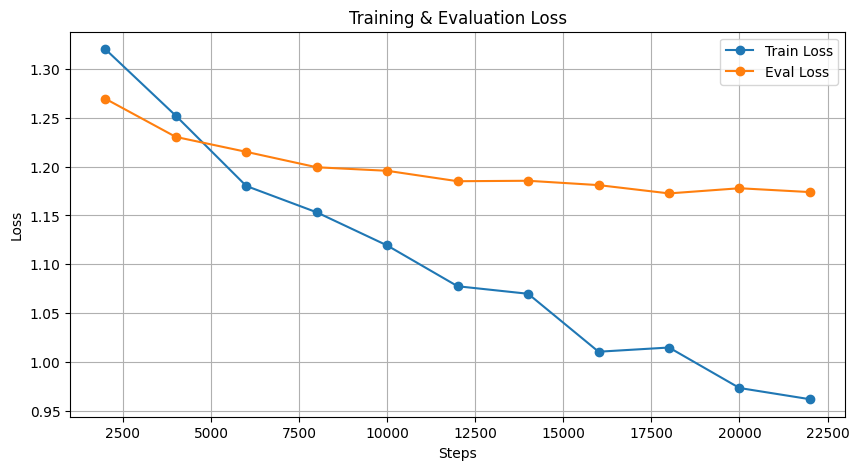

In [ ]:
import matplotlib.pyplot as plt

# 훈련 로그(history)에서 손실(train loss, eval loss) 추출
history = trainer.state.log_history

# 훈련 손실(train_losses)과 검증 손실(eval_losses) 기록을 저장할 리스트
train_losses = []
eval_losses = []
steps = []

# 로그에서 각 항목을 추출
for log in history:
    if 'loss' in log:  # 훈련 손실
        train_losses.append(log['loss'])
        steps.append(log['step'])
    if 'eval_loss' in log:  # 검증 손실
        eval_losses.append(log['eval_loss'])

# 시각화
plt.figure(figsize=(10, 5))

# 훈련 손실(train loss)과 검증 손실(val loss) 그래프
plt.plot(steps[:len(train_losses)], train_losses, label="Train Loss", marker='o')
plt.plot(steps[:len(eval_losses)], eval_losses, label="Eval Loss", marker='o')
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.title("Training & Evaluation Loss")
plt.legend()
plt.grid()

plt.show()

# 테스트

In [ ]:
from transformers import GPT2LMHeadModel, PreTrainedTokenizerFast
import torch

# 체크포인트 경로
checkpoint_path = '/content/drive/MyDrive/프로젝트/심리상담 챗봇/re_KoGPT-2/ckpt/checkpoint-23055'

# 모델과 토크나이저 로드
tokenizer = PreTrainedTokenizerFast.from_pretrained(checkpoint_path)
model = GPT2LMHeadModel.from_pretrained(checkpoint_path)

In [ ]:
from transformers import GenerationConfig

# 모델을 평가 모드로 설정
model.eval()

# 사용자로부터 질문을 입력받고 처리
user_input = input("질문을 입력하세요: ")

# 템플릿 적용
input_text = f"<|system|> 당신은 감정을 고려해 답변하는 상담 챗봇입니다.\n"
input_text += f"<|user|> {user_input}\n"
input_text += "<|emotion|> 슬픔\n"  # 감정은 예시로 '슬픔' 설정, 필요에 맞게 변경

# 토큰화
inputs = tokenizer(input_text, return_tensors="pt")

gen_cfg = GenerationConfig(
    do_sample=False,
    max_length=100,
    repetition_penalty=1.5
)

# 모델 예측
with torch.no_grad():
    outputs = model.generate(
        inputs['input_ids'],
        generation_config = gen_cfg
    )

# 결과 출력
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(generated_text)

질문을 입력하세요: 내가 오늘 발표를 하는데 너무 떨려 어떻하면 좋을까?
<|system|> 당신은 감정을 고려해 답변하는 상담 챗봇입니다.
<|user|> 내가 오늘 발표를 하는데 너무 떨려 어떻하면 좋을까?
<|emotion|> 슬픔
발표에 대한 걱정이 있으시군요. 어떤 것이 가장 걱정되세요? . 괜찮을까요?. 뭔가 좋은 방법이 있을 거예요. 뭘 하면 기분이 나아질 수 있다고 생각하시나요? 는 잘 모르겠
